In [2]:
import pandas as pd 
import numpy as np 
import matplotlib as plt 
df=pd.read_csv('../data/raw/Superstore.csv',encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Data cleaning and preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
#check for duplicated rows
df.duplicated().sum()

np.int64(0)

In [ ]:
#summary statistics
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [3]:
#rename the sales column
df.rename(columns={'Sales':'Revenue'},inplace=True)

In [4]:
#metrics engineering
df['Unit_price']=df['Revenue']/df['Quantity']
df['Discount_amount']=df['Revenue']* df['Discount']
df['Profit_margins']=df['Profit']/df['Revenue']
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Revenue,Quantity,Discount,Profit,Unit_price,Discount_amount,Profit_margins
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,130.9800,0.000000,0.1600
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,243.9800,0.000000,0.3000
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,7.3100,0.000000,0.4700
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,191.5155,430.909875,-0.4000
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.1840,4.473600,0.1125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,8.4160,5.049600,0.1625
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,45.9800,0.000000,0.1700
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,129.2880,51.715200,0.0750
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,7.4000,0.000000,0.4500


In [5]:
# rounding up numerical  columns 
df['Revenue']=df['Revenue'].round().astype(int)
df['Profit']=df['Profit'].round().astype(int)
df['Unit_price']=df['Unit_price'].round().astype(int)
df['Profit_margins']=df['Profit_margins'].round(2)
df['Discount']=df['Discount'].round(2)
df['Discount_amount']=df['Discount_amount'].round(2)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Revenue,Quantity,Discount,Profit,Unit_price,Discount_amount,Profit_margins
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,262,2,0.00,42,131,0.00,0.16
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",732,3,0.00,220,244,0.00,0.30
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,15,2,0.00,7,7,0.00,0.47
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,958,5,0.45,-383,192,430.91,-0.40
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22,2,0.20,3,11,4.47,0.11


In [6]:
#  convert to a datetime 
df['Ship Date']=pd.to_datetime(df['Ship Date'],format='mixed') 
df['Order Date']=pd.to_datetime(df['Order Date'],format='mixed') 

In [7]:
# The date difference between ship ordered and ship date
df['date_diff']=(df['Ship Date']-df['Order Date']).dt.days
df.date_diff

0       3
1       3
2       4
3       7
4       7
       ..
9989    2
9990    5
9991    5
9992    5
9993    5
Name: date_diff, Length: 9994, dtype: int64

In [12]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Revenue', 'Quantity', 'Discount', 'Profit',
       'Unit_price', 'Discount_amount', 'Profit_margins', 'date_diff'],
      dtype='object')

In [21]:
df.to_csv("../data/Cleaned/processed_superstore.csv",index=False)

###  Exploratory analysis

In [ ]:

# Our top most customer
df.groupby('Customer Name')['Profit'].sum().sort_values(ascending=False).head()


Customer Name
Tamara Chand     8981.3239
Raymond Buch     6976.0959
Sanjit Chand     5757.4119
Hunter Lopez     5622.4292
Adrian Barton    5444.8055
Name: Profit, dtype: float64

In [ ]:
# To find discount that is just reducing our profit margins
df[(df['Discount']>df['Discount'].mean()) & (df['Profit_margins']<df['Profit_margins'].mean())]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Revenue,Quantity,Discount,Profit,Unit_price,Discount_amount,Profit_margins
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,958,5,0.45,-383,192,430.91,-0.40
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22,2,0.20,3,11,4.47,0.11
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907,6,0.20,91,151,181.43,0.10
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706,9,0.20,85,190,341.24,0.05
11,12,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,Technology,Phones,Konftel 250 Conference phone - Charcoal black,911,4,0.20,68,228,182.28,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9955,9956,CA-2015-141593,2015-12-14,2015-12-16,Second Class,DB-12970,Darren Budd,Corporate,United States,Los Angeles,...,Furniture,Tables,"Bush Andora Conference Table, Maple/Graphite G...",274,2,0.20,10,137,54.71,0.04
9962,9963,CA-2015-168088,2015-03-19,2015-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383,4,0.32,-68,96,122.71,-0.18
9973,9974,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,Technology,Phones,Avaya 5410 Digital phone,272,5,0.20,27,54,54.39,0.10
9976,9977,US-2016-103674,2016-12-06,2016-12-10,Standard Class,AP-10720,Anne Pryor,Home Office,United States,Los Angeles,...,Technology,Phones,Cisco SPA301,250,2,0.20,31,125,49.92,0.12


In [36]:
# the year on year profit 
year_on_year=df.groupby(df['Order Date'].dt.to_period('Y'))['Profit'].sum().round(0).astype(int).to_frame(name='profit')
year_on_year['pct_change']=year_on_year['profit'].pct_change()
year_on_year

,profit,pct_change
Order Date,,
2014,49519,NaN
2015,61603,0.244028
2016,81789,0.327679
2017,93429,0.142317


In [70]:
#customer purchase frequency
df.groupby(df['Order Date'].dt.to_period('Y'))['Customer Name'].value_counts()


Order Date  Customer Name     
2014        Sam Craven            16
            Arthur Prichep        14
            Resi Pölking          14
            Shirley Daniels       12
            Craig Molinari        11
                                  ..
2017        Vivek Grady            1
            Vivek Sundaresam       1
            Vivian Mathis          1
            Yoseph Carroll         1
            Zuschuss Donatelli     1
Name: count, Length: 2499, dtype: int64

In [ ]:
# 2016 gave us the best profit year to year so analyzing the quarter to quarter
od_2016=df[df['Order Date'].dt.year==2016 ]
od_2016.groupby(od_2016['Order Date'].dt.to_period('Q'))['Profit'].sum().sort_values(ascending=False)

Order Date
2016Q4    38135
2016Q2    16382
2016Q3    15824
2016Q1    11448
Freq: Q-DEC, Name: Profit, dtype: int64

In [74]:

# The ship mode best average number of days
df.groupby('Ship Mode')['date_diff'].mean().sort_values(ascending=False).astype(int)


Ship Mode
Standard Class    5
Second Class      3
First Class       2
Same Day          0
Name: date_diff, dtype: int64

On average same day ship mode is achieving it's result.which is a day while first class on average takes two days. if their are missing  values in postal code.since postal code is by state .

In [75]:
 #The count of transactions per ship mode
df.groupby('Ship Mode')['date_diff'].value_counts().sort_values(ascending=False)


Ship Mode       date_diff
Standard Class  4            2402
                5            1740
                6            1203
Second Class    2             764
First Class     3             623
Standard Class  7             621
First Class     2             570
Same Day        0             519
Second Class    5             429
                3             380
                4             371
First Class     1             344
Same Day        1              24
Standard Class  3               2
First Class     4               1
Second Class    1               1
Name: count, dtype: int64

In [ ]:
# Quality check that we are delivering what we said on the same day
df[(df['Ship Mode']=='Same Day') & (df['date_diff']>1)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sub-Category,Product Name,Revenue,Quantity,Discount,Profit,Unit_price,Discount_amount,Profit_margins,date_diff


In [77]:
# profit per ship mode
df.groupby('Ship Mode')['Profit'].mean()

Ship Mode
First Class       31.832900
Same Day          29.268877
Second Class      29.526992
Standard Class    27.489611
Name: Profit, dtype: float64

In [ ]:
# Region analysis
df.groupby('Region').agg(total_sales=('Sales','sum'),
                         total_profit=('Profit','sum'),
                         average_discount=('Discount','mean'))


,total_sales,total_profit,average_discount
Region,,,
Central,501239.8908,39706.3625,0.240353
East,678781.2400,91522.7800,0.145365
South,391721.9050,46749.4303,0.147253
West,725457.8245,108418.4489,0.109335


The west is the most profitable region .The region don't only have heavy sales , it's margins are quite high.

### customer segregation analysis 

In [52]:
#customers who bought more than one product
mine=df.groupby('Customer Name')['Product Name'].value_counts().sort_values(ascending=False)
mine

Customer Name     Product Name                                       
Greg Guthrie      Staples                                                2
Bart Pistole      Wi-Ex zBoost YX540 Cellular Phone Signal Booster       2
John Lee          Howard Miller 11-1/2" Diameter Grantwood Wall Clock    2
George Bell       Things To Do Today Pad                                 2
Joe Elijah        Global Executive Mid-Back Manager's Chair              2
                                                                        ..
Zuschuss Carroll  Panasonic KP-4ABK Battery-Operated Pencil Sharpener    1
                  Plantronics Audio 478 Stereo USB Headset               1
                  SAFCO Commercial Wire Shelving, Black                  1
                  SANFORD Liquid Accent Tank-Style Highlighters          1
Aaron Smayling    Avery Trapezoid Extra Heavy Duty 4" Binders            1
Name: count, Length: 9941, dtype: int64

In [78]:
df2=df.select_dtypes(include=[int,float])
df2

,Row ID,Postal Code,Revenue,Quantity,Discount,Profit,Unit_price,Discount_amount,Profit_margins,date_diff
0,1,42420,262,2,0.00,42,131,0.00,0.16,3
1,2,42420,732,3,0.00,220,244,0.00,0.30,3
2,3,90036,15,2,0.00,7,7,0.00,0.47,4
3,4,33311,958,5,0.45,-383,192,430.91,-0.40,7
4,5,33311,22,2,0.20,3,11,4.47,0.11,7
...,...,...,...,...,...,...,...,...,...,...
9989,9990,33180,25,3,0.20,4,8,5.05,0.16,2
9990,9991,92627,92,2,0.00,16,46,0.00,0.17,5
9991,9992,92627,259,2,0.20,19,129,51.72,0.08,5
9992,9993,92627,30,4,0.00,13,7,0.00,0.45,5


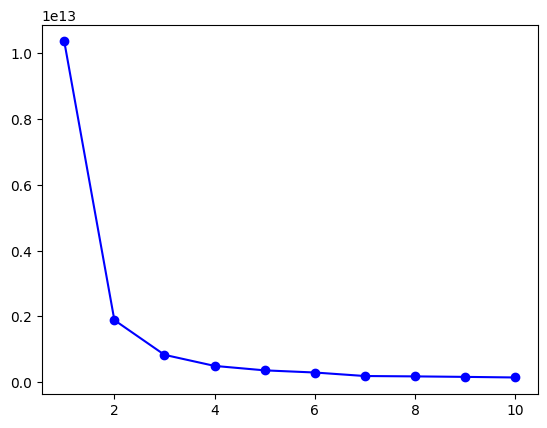

In [100]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
inertia=[]
K=range(1,11)
for k in K:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(df2)
    inertia.append(kmeans.inertia_)
plt.plot(K,inertia,'bo-')
plt.show()


In [ ]:
kmeans=KMeans(n_clusters=2,random_state=42)
df2['clusters']=kmeans.fit_predict(df2)
df2

,Row ID,Postal Code,Revenue,Quantity,Discount,Profit,Unit_price,Discount_amount,Profit_margins,date_diff,labels,cluster,clusters
0,1,42420,262,2,0.00,42,131,0.00,0.16,3,0,0,0
1,2,42420,732,3,0.00,220,244,0.00,0.30,3,0,0,0
2,3,90036,15,2,0.00,7,7,0.00,0.47,4,1,1,1
3,4,33311,958,5,0.45,-383,192,430.91,-0.40,7,0,0,0
4,5,33311,22,2,0.20,3,11,4.47,0.11,7,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,33180,25,3,0.20,4,8,5.05,0.16,2,0,0,0
9990,9991,92627,92,2,0.00,16,46,0.00,0.17,5,1,1,1
9991,9992,92627,259,2,0.20,19,129,51.72,0.08,5,1,1,1
9992,9993,92627,30,4,0.00,13,7,0.00,0.45,5,1,1,1


### forecasting profit with OLS regression analysis

In [ ]:
import statsmodels.api as sm
X=df['Discount']
y=df['Profit']
X=sm.add_constant(X)
model=sm.OLS(y,X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     505.7
Date:                Thu, 01 Jan 2026   Prob (F-statistic):          2.70e-109
Time:                        13:18:02   Log-Likelihood:                -68465.
No. Observations:                9994   AIC:                         1.369e+05
Df Residuals:                    9992   BIC:                         1.369e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.5594      2.867     23.565      0.0

Are our discount actually increasing market share/ profits or are we just cutting our profits.

In [8]:
#first we divide the dataset into discounted_sales and non_discounted_sales
discounted_sales=df[df['Discount']  > 0.0]
non_discounted=df[df['Discount']  == 0.0]


In [9]:
discounted_sales['Profit'].sum()

np.int64(-34602)

In [22]:
do=non_discounted['Profit'].sum()
do

np.int64(320942)

In [15]:
tf=df['Profit'].sum()
tf

np.int64(286340)

In [21]:
dif=((do-tf)/tf)*100
dif.round(2)

np.float64(12.08)

We can see from above that the discounted sales made a loss of -$34604 and brought our profit down by 12.08% from the profit of $320942.

Market share analysis below 

In [23]:

len(discounted_sales)

5196

In [24]:
len(non_discounted)

4798

first, we can see above the volume of transactions of total discounted_sales are more.

In [35]:
discounted_sales['Product Name'].nunique()

1657

In [36]:
non_discounted["Product Name"].nunique()

1622

We can see above that discounted products gave us the opportunity to sell more products than non_discounted

In [39]:
missing_names=non_discounted[~non_discounted['Product Name'].isin(discounted_sales['Product Name'])]
print(len(missing_names))

588


In [41]:
missing_names=discounted_sales[discounted_sales['Product Name'].isin(non_discounted['Product Name'])]
print(len(missing_names))

4399


We checked above for the similarity or variability of the products based on the discounted and non_discounted programes

The region below will give us a perfect look at how the market share response to discounted and non_discounted products.

In [ ]:

discounted_sales['Region'].value_counts()

Region
Central    1495
West       1487
East       1399
South       815
Name: count, dtype: int64

In [55]:
non_discounted['Region'].value_counts()

Region
West       1716
East       1449
Central     828
South       805
Name: count, dtype: int64

Our discount campaign in terms of market share was pretty sucessful in the central areas but was unsuccessful in the south.
I recommend restragizing the discount method for customers in the south for better result. The west is where our premium customers are.

In [62]:
#ow can we reduce our delivery time based on our shipmode.
#df.columns
#df.groupby('Ship Mode')['Profit'].mean()
#df.groupby('Ship Mode')['Profit'].sum()
df['Ship Mode'].value_counts()
#df.columns

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

In [66]:
st=df[df['Ship Mode']=='Standard Class']
sd=df[df['Ship Mode']=='Same Day']
st['Unit_price'].mean()

np.float64(59.35405495978552)

In [68]:
sd['Unit_price'].mean()
#df.columns

np.float64(65.8987108655617)

In [70]:
st['Discount'].mean()

np.float64(0.1600234584450402)

In [71]:
sd['Discount'].mean()

np.float64(0.15239410681399632)

In [81]:
df.groupby('Ship Mode')['Discount'].mean()

Ship Mode
First Class       0.164610
Same Day          0.152394
Second Class      0.138895
Standard Class    0.160023
Name: Discount, dtype: float64

In [65]:
df.groupby('Ship Mode')['Quantity'].mean()
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Revenue', 'Quantity', 'Discount', 'Profit',
       'Unit_price', 'Discount_amount', 'Profit_margins', 'date_diff'],
      dtype='object')

In [70]:
st.groupby('Ship Mode')['Region'].value_counts()

Ship Mode       Region 
Standard Class  West       1882
                East       1673
                Central    1439
                South       974
Name: count, dtype: int64

In [71]:
df.groupby('Ship Mode')['Unit_price'].mean()

Ship Mode
First Class       64.635241
Same Day          65.898711
Second Class      61.385090
Standard Class    59.354055
Name: Unit_price, dtype: float64

In [72]:
df.groupby('Ship Mode')['date_diff'].mean()

Ship Mode
First Class       2.182705
Same Day          0.044199
Second Class      3.238046
Standard Class    5.006535
Name: date_diff, dtype: float64

In [74]:
df.groupby('Region')['Unit_price'].mean()

Region
Central    56.786913
East       64.092697
South      61.690741
West       60.699344
Name: Unit_price, dtype: float64

In [75]:
df['Region'].value_counts()

Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64

In [77]:
df.groupby('Region')['Quantity'].sum()

Region
Central     8780
East       10618
South       6209
West       12266
Name: Quantity, dtype: int64

In [80]:
df.groupby('Ship Mode')['Quantity'].sum()

Ship Mode
First Class        5693
Same Day           1960
Second Class       7423
Standard Class    22797
Name: Quantity, dtype: int64

In [83]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Revenue', 'Quantity', 'Discount', 'Profit',
       'Unit_price', 'Discount_amount', 'Profit_margins', 'date_diff'],
      dtype='object')